# Ridge回帰

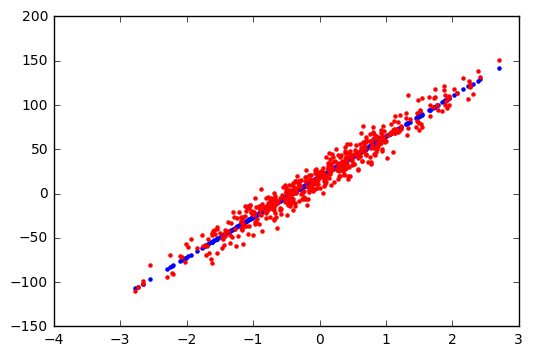

In [48]:
# import cells
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


def addBias(x):
    b = np.zeros(x.shape[0]).reshape(-1, 1) + 1.0
    v = np.hstack((x, b))
    return v

def ridgeRegression(x, y, lam=0.1):
    X = addBias(x)
    lambdaIdentity = lam * np.identity(X.shape[1])
    mat1 = np.linalg.inv((X.T @ X) + lambdaIdentity)
    mat2 = mat1 @ X.T
    w = mat2 @ y
    return w

def ridgeRegressionPrediction(x, w):
    X = addBias(x)
    ret = [np.dot(w, v) for v in X]
    return ret

# fit 
x, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0, bias=20.0)
w = ridgeRegression(x, y)

# show
pred = ridgeRegressionPrediction(x, w)
plt.scatter(x, pred, color='blue', marker='.')
plt.scatter(x, y, color='red', marker='.')
plt.show()

(200, 15)
(200,)


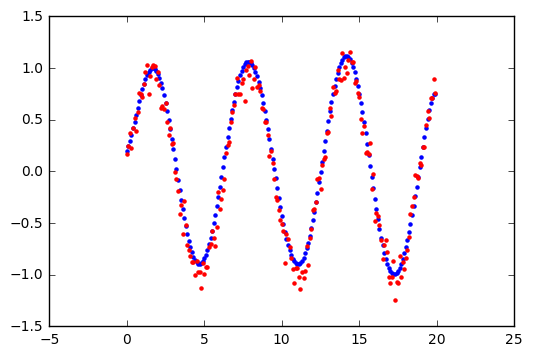

In [61]:
# sin波
# taylor展開
import numpy as np
import matplotlib.pyplot as plt

dim = 15
ar = np.arange(0, 20, 0.1)
y = np.array([np.sin(val) + np.random.normal(0, 0.1) for val in ar])
x = np.array([[val**k for k in range(1, dim+1)] for val in ar]).reshape(-1, dim)
print(x.shape)
print(y.shape)

w = ridgeRegression(x, y)
pred = ridgeRegressionPrediction(x, w)
plt.scatter(ar, pred, color='blue', marker='.')
plt.scatter(ar, y, color='red', marker='.')
plt.show()

(100, 3)
(100,)
[[0.1 0.  0.  0. ]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  0.1]]


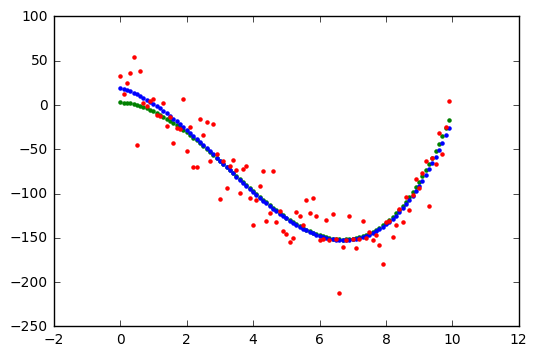

In [44]:
# 多項式
## y = x^3 - 10x^2 - x + 3
import numpy as np
import matplotlib.pyplot as plt

def getPoly(val):
    return val**3 - 10.0 * val**2 - val + 3.0

dim = 3
ar = np.arange(0, 10, 0.1)
trueY = np.array([getPoly(val) for val in ar])
y = np.array([getPoly(val)+np.random.normal(0, 20.0) if (val>0.5 and val < 9.5) else getPoly(val)+np.random.normal(0, 30) for val in ar])
x = np.array([[val**k for k in range(1, dim+1)] for val in ar]).reshape(-1, dim)
print(x.shape)
print(y.shape)

w = ridgeRegression(x, y)
pred = ridgeRegressionPrediction(x, w)
plt.scatter(ar, trueY, color='green', marker='.')
plt.scatter(ar, pred, color='blue', marker='.')
plt.scatter(ar, y, color='red', marker='.')
plt.show()